# ANN Model for Early Warning System for Customer Support

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
#reading the dataset
data = pd.read_csv('/content/drive/MyDrive/TechConsulting/Early Warning System for Customer Support/Churn_Modelling.csv')
data= data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [173]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [174]:
# data desciption
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [175]:
# Checking missing values
data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## EDA

<Axes: >

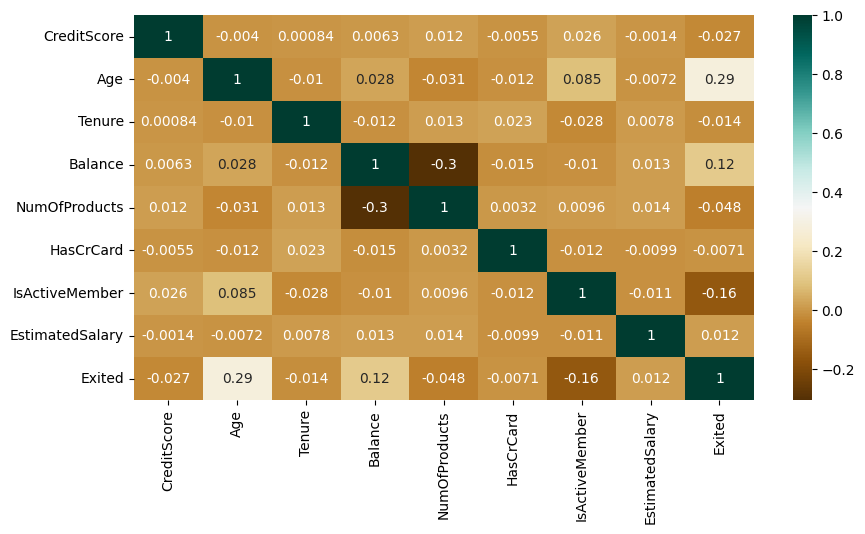

In [176]:
## Corelation matrix
import seaborn as sns
plt.figure(figsize=(10, 5))
c = data.corr(numeric_only=True)
sns.heatmap(c, cmap='BrBG', annot=True)

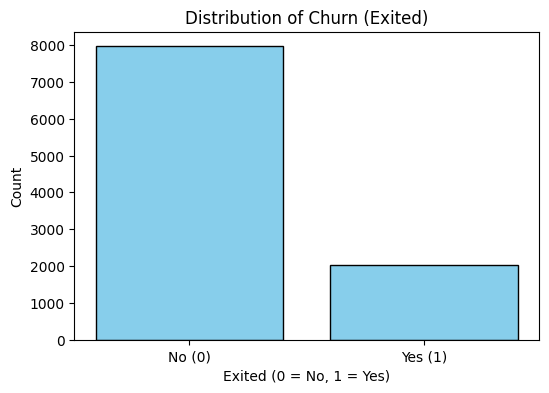

In [177]:
# target variable distribution
exited_counts = data['Exited'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(exited_counts.index, exited_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Churn (Exited)')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

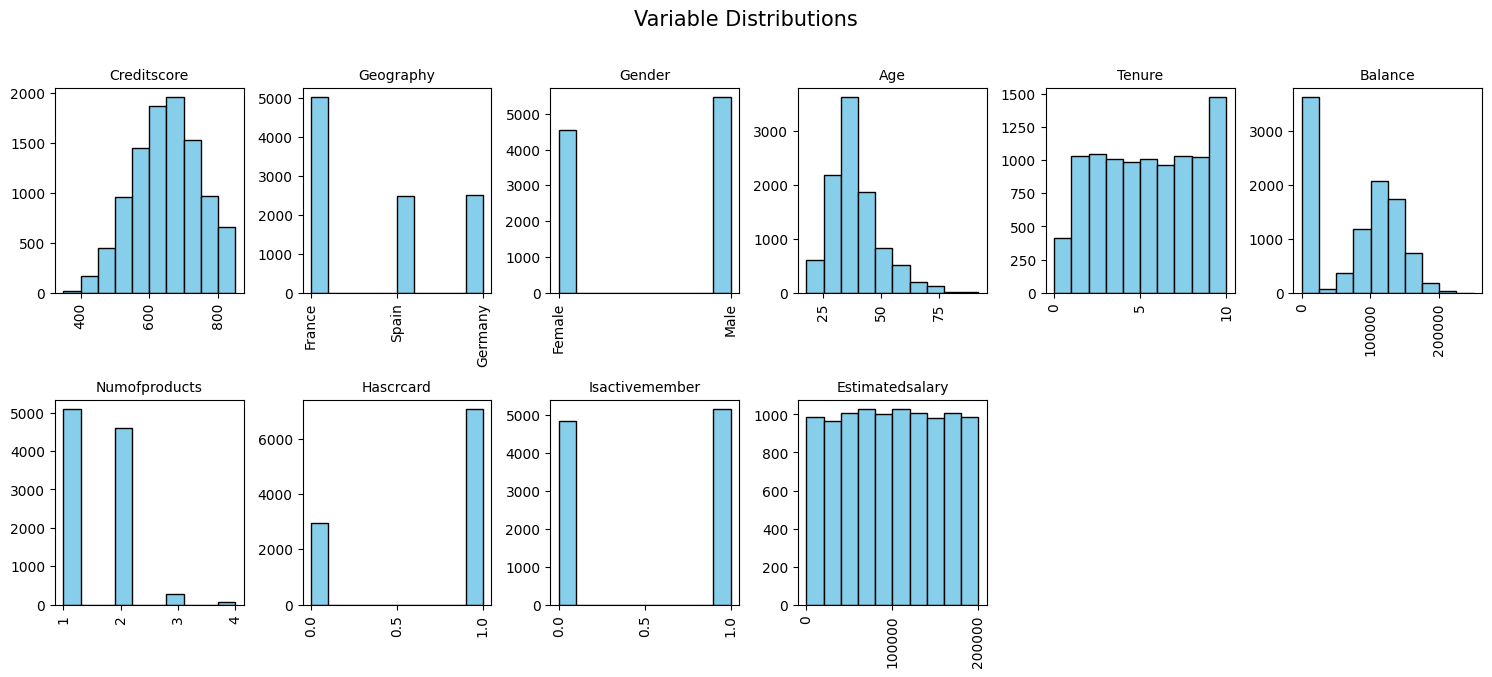

In [178]:
# varibale distribution
# Function to plot variable distributions
def plot_variable_distributions(df):
    features = data.columns[:-1]
    plt.figure(figsize=(15, 15))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 6, i)  # Adjust the grid size as per the number of features
        df[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=10)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(rotation=90)

    plt.tight_layout(pad=1)
    plt.suptitle("Variable Distributions", fontsize=15, y=1.03)
    plt.show()
# Call the function to plot histograms of the DataFrame excluding the first column
plot_variable_distributions(data)

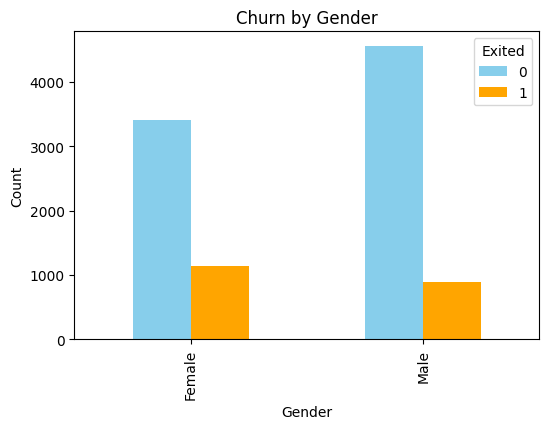

In [179]:
gender_churn = data.groupby(['Gender', 'Exited']).size().unstack()
gender_churn.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6,4))
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

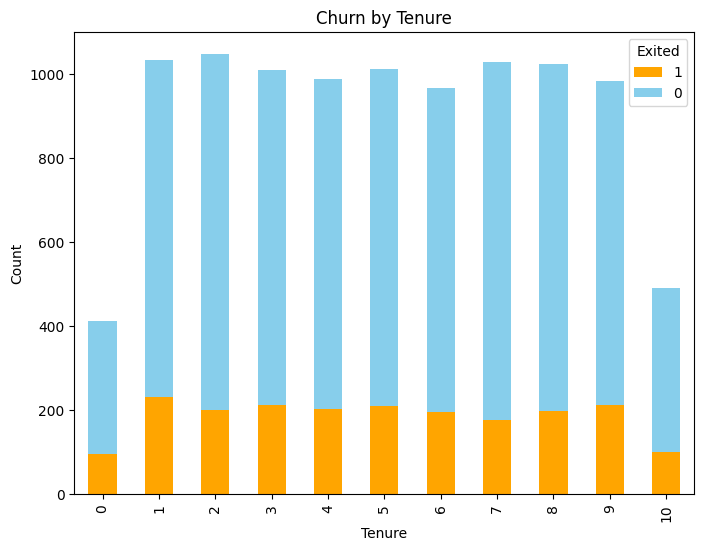

In [180]:
# Churn by Tenure
tenure_churn = data.groupby(['Tenure', 'Exited']).size().unstack()
tenure_churn = tenure_churn[[1, 0]]
tenure_churn.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], figsize=(8,6))
plt.title('Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

<ipython-input-181-ff4cd00f48ad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = data.groupby(pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+']))['Exited'].mean()


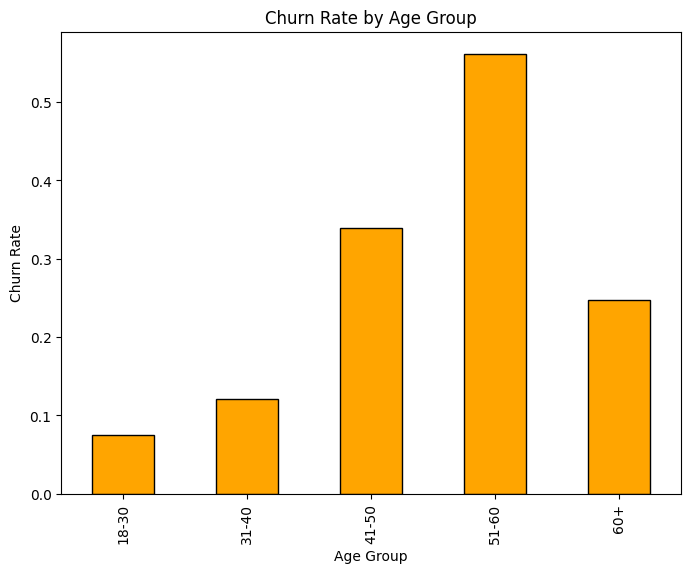

In [181]:
## churn rate by Age
age_churn = data.groupby(pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+']))['Exited'].mean()
plt.figure(figsize=(8,6))
age_churn.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()


<ipython-input-182-8255b7de9b9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=data, palette="Set2")


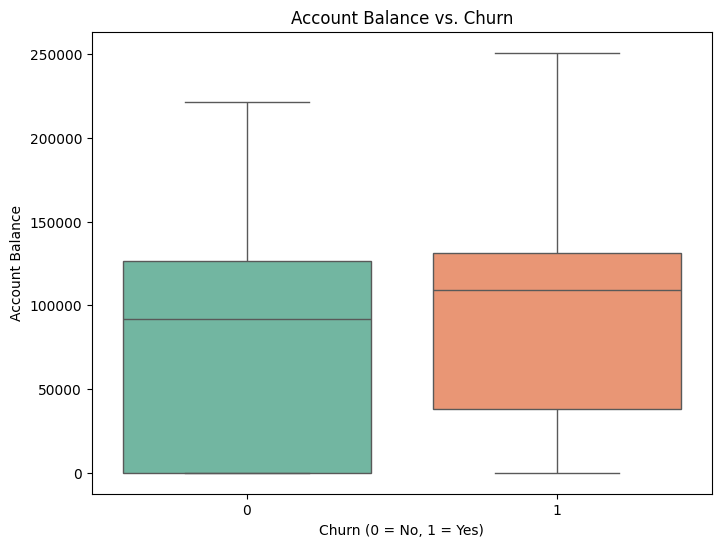

In [182]:
## Churn by account balance
plt.figure(figsize=(8,6))
sns.boxplot(x='Exited', y='Balance', data=data, palette="Set2")
plt.title('Account Balance vs. Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Account Balance')
plt.show()

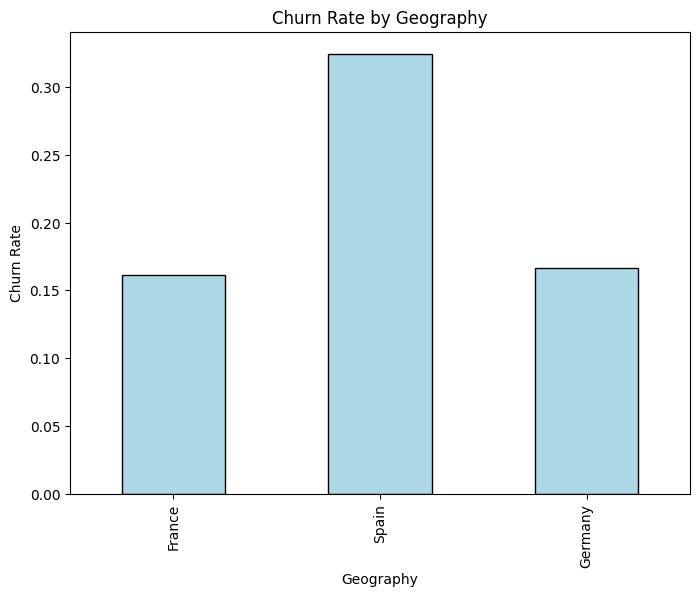

In [183]:
## Churn by geography
geography_churn = data.groupby('Geography')['Exited'].mean()
plt.figure(figsize=(8,6))
geography_churn.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks([0, 1, 2], ['France', 'Spain', 'Germany'])
plt.show()


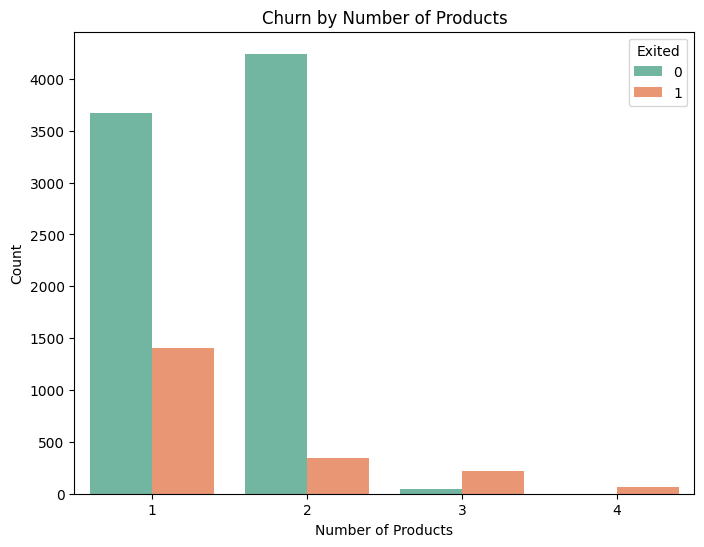

In [184]:
## churn by number of products
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data, palette='Set2')
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()


## Preparation

In [185]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [186]:
## encoding
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True, dtype=int)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [187]:
# ## Transformation
# data['CreditScore_log'] = np.log1p(data['CreditScore'])
# data['Age_log'] = np.log1p(data['Age'])
# data['Balance_log'] = np.log1p(data['Balance'])
# data['EstimatedSalary_log'] = np.log1p(data['EstimatedSalary'])
# data

In [188]:
data.shape

(10000, 12)

In [189]:
## outliers
def treat_outliers(df, features):
    df_filtered = df.copy()
    for column in features:
        Q1 = df_filtered[column].quantile(0.25)
        Q3 = df_filtered[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered

n_features= ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
data_cleaned = treat_outliers(data, n_features)
data_cleaned.shape

#data_cleaned= data


(9626, 12)

In [190]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [191]:
## Scaling
def min_max_scale(df, exclude_columns=None):
    df_scaled = df.copy()
    scaling_params = {}
    for column in df_scaled.columns:
        if column not in exclude_columns:
            min_value = df_scaled[column].min()
            max_value = df_scaled[column].max()
            df_scaled[column] = (df_scaled[column] - min_value) / (max_value - min_value)
            scaling_params[column] = {'min': min_value, 'max': max_value}
    return df_scaled, scaling_params
exclude_columns = ['HasCrCard', 'IsActiveMember', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
data_scaled, scaling_params = min_max_scale(data_cleaned, exclude_columns)
data_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.505353,0.545455,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.481799,0.522727,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.254818,0.545455,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.676660,0.477273,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000000,0.568182,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.830835,0.477273,0.5,0.000000,0.333333,1,0,0.481341,0,0,0,1
9996,0.284797,0.386364,1.0,0.228657,0.000000,1,1,0.508490,0,0,0,1
9997,0.698073,0.409091,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0
9998,0.832976,0.545455,0.3,0.299226,0.333333,1,0,0.464429,1,1,0,1


## Modelling

In [192]:
## data for modelling
model_data = data_scaled.copy()
model_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.505353,0.545455,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.481799,0.522727,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.254818,0.545455,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.676660,0.477273,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000000,0.568182,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.830835,0.477273,0.5,0.000000,0.333333,1,0,0.481341,0,0,0,1
9996,0.284797,0.386364,1.0,0.228657,0.000000,1,1,0.508490,0,0,0,1
9997,0.698073,0.409091,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0
9998,0.832976,0.545455,0.3,0.299226,0.333333,1,0,0.464429,1,1,0,1


In [193]:
## checking imbalance
model_data['Exited'].value_counts()

,count
Exited,
0,7677
1,1949


In [194]:
## over sampling
majority_class = model_data[model_data['Exited'] == 0]
minority_class = model_data[model_data['Exited'] == 1]
minority_class_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)
oversampled_data = pd.concat([majority_class, minority_class_oversampled])
oversampled_data = oversampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
oversampled_data['Exited'].value_counts()

#oversampled_data = model_data

,count
Exited,
1,7677
0,7677


In [195]:
## train test split
train_size = int(0.8 * len(oversampled_data))
train_df = oversampled_data[:train_size]
test_df = oversampled_data[train_size:]

X_train = train_df.drop('Exited', axis=1)
y_train = train_df['Exited']
X_test = test_df.drop('Exited', axis=1)
y_test = test_df['Exited']
len(X_train), len(y_train), len(X_test), len(y_test)

(12283, 12283, 3071, 3071)

In [196]:
## to_numpy
X_train= X_train.to_numpy()
y_train= y_train.to_numpy()
X_test= X_test.to_numpy()
y_test= y_test.to_numpy()
set(y_train)

{0, 1}

# Binary Logistic Regression Class

## Useful Functions

In [197]:
#losses, activations,metrics
def sigmoid(h):
  return 1 / (1 + np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+ (1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y == y_hat)

In [198]:
class LogisticRegression():

  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.W = None
    self.b = None

  def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    #Initialize Weight and biases
    self.W= np.random.randn(D)
    self.b= np.random.randn(1)
    #Create Zero values container for J
    J = np.zeros(epochs)

    #SGD
    for epoch in range(epochs):
      p_hat= self.__forward__(X)
      J[epoch]= cross_entropy(y, p_hat)

      #Weight and bias Update Rules
      self.W -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
      plt.show()

  def __forward__(self, X):
    return sigmoid(X@self.W+self.b)

  def predict(self, X):
    return (self.__forward__(X)>= self.thresh).astype(np.int32)

In [199]:
log_reg= LogisticRegression()

In [136]:
epochs_list = [3500, 4000, 4500]
eta_list = [0.08, 0.1, 0.12]

best_accuracy = 0
best_params = {'epochs': None, 'eta': None}

for epochs in epochs_list:
    for eta in eta_list:
        log_reg.fit(X_train, y_train, epochs=epochs, eta=eta, show_curve=False)

        # Predict and calculate accuracy
        y_hat_BLR = log_reg.predict(X_test)
        accuracy_val = accuracy(y_test, y_hat_BLR)

        # Track the best accuracy and parameters
        if accuracy_val > best_accuracy:
            best_accuracy = accuracy_val
            best_params['epochs'] = epochs
            best_params['eta'] = eta

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: Epochs={best_params['epochs']}, Eta={best_params['eta']}")


Best Accuracy: 0.7258
Best Parameters: Epochs=4500, Eta=0.12


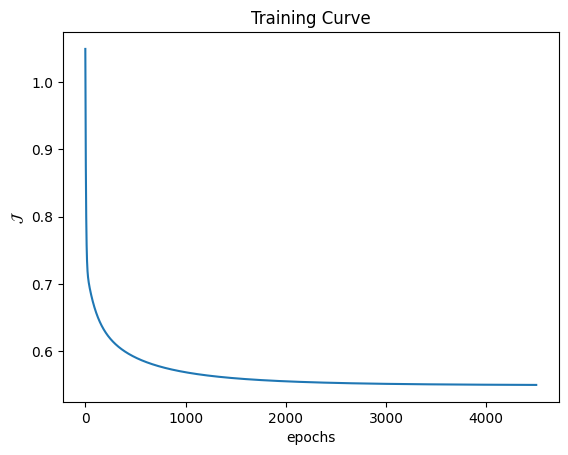

Training Accuracy:  0.7245
[-0.31768667  4.52905624 -0.23857845  0.70784429 -0.33213243 -0.13377152
 -0.77718349 -0.04615254  0.85188081  0.02771341 -0.53021483]
[-1.68362384]


In [200]:
log_reg.fit(X_train, y_train, epochs= 4500, eta= 0.12, show_curve= True)
y_hat_BLR = log_reg.predict(X_test)
print(f"Training Accuracy: {accuracy(y_test, y_hat_BLR): 0.4f}")
print(log_reg.W)
print(log_reg.b)

Text(0.5, 47.7222222222222, 'Predicted label')

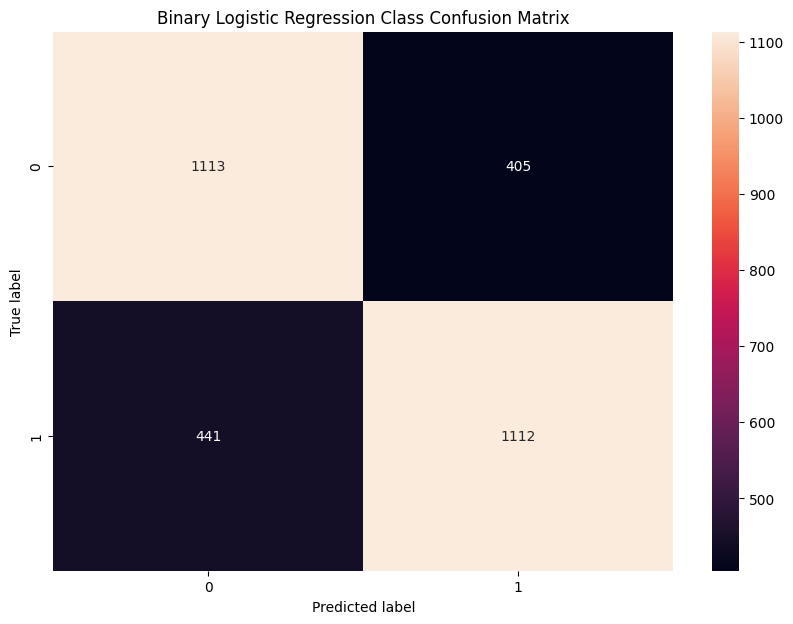

In [201]:
#Binary Logistic Regression Class
plt.figure(figsize=(10,7))
y_actual_BLR = pd.Series(y_test, name='Actual')
y_pred_BLR = pd.Series(y_hat_BLR, name='Predicted')
cm = pd.crosstab(y_actual_BLR, y_pred_BLR)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Binary Logistic Regression Class Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [138]:
# #Binary Logistic Regression Class
# plt.figure(figsize=(10,7))
# y_actual_BLR = pd.Series(y_test, name='Actual')
# y_pred_BLR = pd.Series(y_hat_BLR, name='Predicted')
# cm = pd.crosstab(y_actual_BLR, y_pred_BLR)
# ax = sns.heatmap(cm, annot=True, fmt="d")
# plt.title("Binary Logistic Regression Class Confusion Matrix")
# plt.ylabel('True label')
# plt.xlabel('Predicted label')

# Two-Layer Feed Forward Perceptron

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Activation Functions

In [203]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims= True)

#np.tanh

## Useful Functions

In [204]:
def one_hot_encode(y):
  N = len(y)
  K =len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i, y[i]]=1
  return Y

def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))

def binary_cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+ (1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y == y_hat)

## Shallow ANN Class

In [205]:
class Shallow_ANN():

  def fit(self, X, y, neurons=6, eta=1e-3, epochs=1e3, show_curve= True):
    epochs= int(epochs)
    N, D = X.shape
    Y = one_hot_encode(y)
    #Y = y.reshape(-1, 1)
    #Y=y
    K= Y.shape[1]

    #Weights Initialization
    self.W ={l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D, neurons],[neurons, K]), 1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
    #Define Activations
    self.a ={1:np.tanh, 2:softmax}

    J= np.zeros(epochs)

    #SGD Steps
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch]= cross_entropy(Y, self.Z[2])
      #Weight update rules for output layer(Layer 2)
      self.W[2] -= eta*(1/N)* self.Z[1].T@(self.Z[2] - Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #Weight Update Rule for Layer 1
      #self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      #self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
      plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)
    #return (self.Z[2] > 0.5).astype(int)

In [209]:
# Define ranges for hyperparameters to test
neurons_list = [2, 4, 6, 8]  # Number of neurons to try
eta_list = [0.01, 0.05, 0.1]  # Learning rates to test
epochs_list = [2000, 4000, 8000]  # Epochs to test

best_accuracy = 0
best_params = {'neurons': None, 'eta': None, 'epochs': None}

# Loop through all combinations of hyperparameters
for neurons in neurons_list:
    for eta in eta_list:
        for epochs in epochs_list:
            print(f"Trying: Neurons={neurons}, Eta={eta}, Epochs={epochs}")

            # Initialize the model with the current configuration
            my_ann = Shallow_ANN()

            # Fit the model with current hyperparameters
            my_ann.fit(X_train, y_train, neurons=neurons, eta=eta, epochs=epochs, show_curve=False)

            # Predict on the test set
            y_hat_2LFF = my_ann.predict(X_test)

            # Calculate accuracy
            accuracy_val = accuracy(y_test, y_hat_2LFF)
            print(f"Accuracy: {accuracy_val:.4f} | Neurons: {neurons}, Eta: {eta}, Epochs: {epochs}")

            # Track the best performing hyperparameters
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_params['neurons'] = neurons
                best_params['eta'] = eta
                best_params['epochs'] = epochs

# Print the best result
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: Neurons={best_params['neurons']}, Eta={best_params['eta']}, Epochs={best_params['epochs']}")


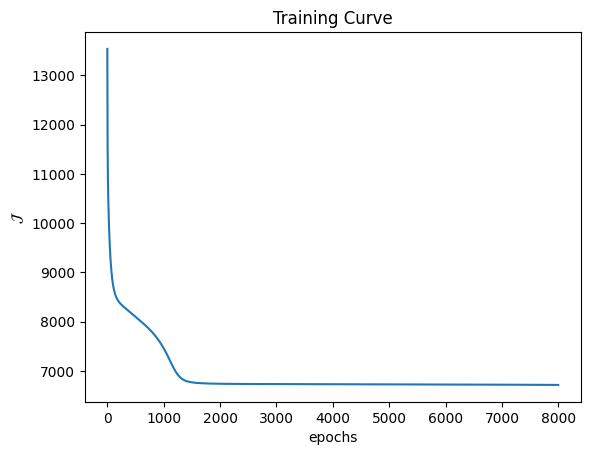

Accuracy:  0.7323347443829371
{1: array([[ 0.62799951,  0.53056275, -1.13659122, -0.01950681],
       [-0.51098416, -1.42374138, -0.66142178,  1.98602998],
       [-0.11328237, -0.5119192 , -0.97500364, -0.09710407],
       [-0.97496391, -0.36327879,  0.02422441,  0.251694  ],
       [-2.17776282,  0.31109604,  0.27490795, -0.21974436],
       [ 0.08837398, -0.57468743,  0.59100345, -0.03834669],
       [-0.48482615, -1.23939884,  0.79512002, -0.34500277],
       [ 0.63977724, -1.26610834,  0.13822085,  0.02210972],
       [-0.25397988,  0.1944344 , -0.70004899,  0.33049197],
       [ 0.65995321, -0.11790284,  0.39217273,  0.0213824 ],
       [ 3.92258091, -0.56943913, -1.26083242,  0.13298094]]), 2: array([[ 0.05297944, -0.44038011],
       [ 0.17970899, -0.08381809],
       [ 0.62186464,  0.41513336],
       [-2.55111934,  0.43739169]])}
{1: array([-2.09331761, -0.57821027, -1.58123866, -1.31860084]), 2: array([0.62954312, 0.95837611])}


In [212]:
my_ann = Shallow_ANN()
#neurons= 2,  eta=0.001, epochs = 30000
#eta=0.1, epochs=4000
# Neurons=4, Eta=0.1, Epochs=8000
my_ann.fit(X_train, y_train, neurons= 4,  eta=0.1, epochs = 8000, show_curve= True )
#my_ann.fit(X_train, y_train, neurons= 6, eta=1e-3, epochs=1e4, show_curve= True )
y_hat_2LFF =my_ann.predict(X_test)

print("Accuracy: ", accuracy(y_test, y_hat_2LFF))
print(my_ann.W)
print(my_ann.B)

Text(0.5, 47.7222222222222, 'Predicted label')

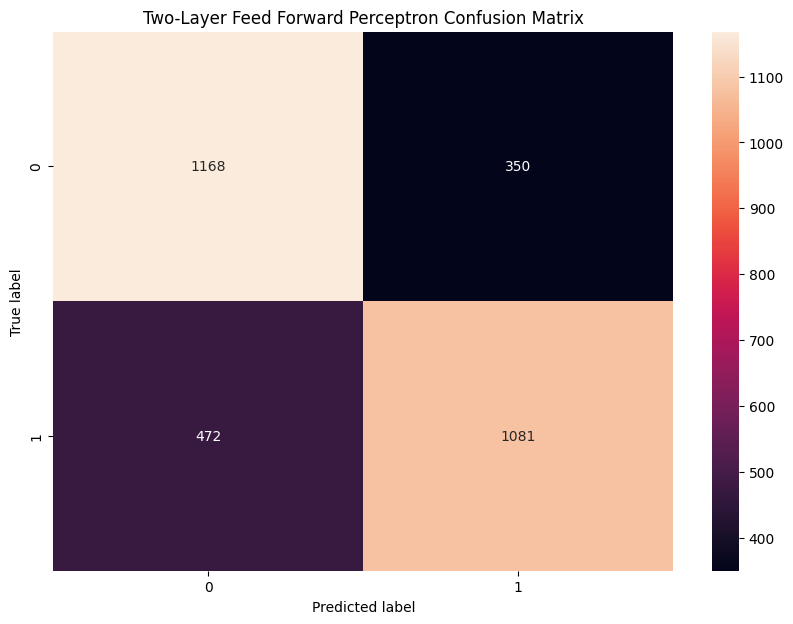

In [213]:
#.reshape(-1)
## Two-Layer Feed Forward Perceptron
plt.figure(figsize=(10,7))
y_actual_2LFF = pd.Series(y_test, name='Actual')
y_pred_2LFF = pd.Series(y_hat_2LFF, name='Predicted')
cm = pd.crosstab(y_actual_2LFF, y_pred_2LFF)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Two-Layer Feed Forward Perceptron Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [145]:
# #testing 2
# class Shallow_ANN2():

#   def fit(self, X, y, neurons=6, eta=1e-3, epochs=1e3, show_curve= True):
#     epochs= int(epochs)
#     N, D = X.shape
#     Y = one_hot_encode(y)
#     K= Y.shape[1]

#     #Weights Initialization
#     self.W ={l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D, neurons],[neurons, K]), 1)}
#     self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
#     #Define Activations
#     self.a ={1:np.tanh, 2:softmax}

#     J= np.zeros(epochs)

#     #SGD Steps
#     for epoch in range(epochs):
#       self.__forward__(X)
#       J[epoch]= cross_entropy(Y, self.Z[2])
#       #Weight update rules for output layer(Layer 2)
#       self.W[2] -= eta*(1/N)* self.Z[1].T@(self.Z[2] - Y)
#       self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
#       #Weight Update Rule for Layer 1
#       #self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
#       #self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
#       self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
#       self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

#     if show_curve:
#       plt.figure()
#       plt.plot(J)
#       plt.xlabel('epochs')
#       plt.ylabel('$\mathcal{J}$')
#       plt.title('Training Curve')
#       plt.show()

#   def __forward__(self, X):
#     self.Z ={0:X}
#     for l in sorted(self.W.keys()):
#       self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])

#   def predict(self, X):
#     self.__forward__(X)
#     return self.Z[2].argmax(axis=1)

In [146]:
# my_ann2 = Shallow_ANN2()
# my_ann2.fit(X_train, y_train, neurons= 2,  eta=0.001, epochs = 30000, show_curve= True )
# y_hat_my_ann2 =my_ann2.predict(X_test)

# print("Accuracy: ", accuracy(y_test, y_hat_my_ann2))
# print(my_ann2.W)
# print(my_ann2.B)

In [147]:
# #neurons_list = [2, 3, 5]
# # eta_list = [1e-3, 1e-2, 1e-1]
# # epochs_list = [1e4, 2e4, 3e4]

# neurons_list = [2, 3, 4]       # Slight increase in neuron count
# eta_list = [0.001, 0.002, 0.005]  # Fine-tuning the learning rate
# epochs_list = [20000, 25000, 30000]  # Reducing epochs
# l2_list = [0.001, 0.01]

# best_accuracy = 0
# best_params = {'neurons': None, 'eta': None, 'epochs': None}

# # Loop through different combinations of hyperparameters
# for neurons in neurons_list:
#     for eta in eta_list:
#         for epochs in epochs_list:
#             my_ann = Shallow_ANN()  # Initialize your ANN
#             my_ann.fit(X_train, y_train, neurons=neurons, eta=eta, epochs=int(epochs), show_curve=False)

#             # Predict and calculate accuracy
#             y_hat_2LFF = my_ann.predict(X_test)
#             accuracy_val = accuracy(y_test, y_hat_2LFF)

#             # Keep track of the best accuracy and parameters
#             if accuracy_val > best_accuracy:
#                 best_accuracy = accuracy_val
#                 best_params['neurons'] = neurons
#                 best_params['eta'] = eta
#                 best_params['epochs'] = epochs

# print(f"Best Accuracy: {best_accuracy:.4f}")
# print(f"Best Parameters: Neurons={best_params['neurons']}, Eta={best_params['eta']}, Epochs={best_params['epochs']}")


# Artificial Neural Net with Back Propagation and Variable Architecture

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [215]:
# Useful functions
# Activations
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims= True)

# Loss Functions

def cross_entropy(Y, P_hat):
  return -(1/len(Y)*np.sum(Y*np.log(P_hat)))

def binary_cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+ (1-y)*np.log(1-p_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))* np.sum((Y-Y_hat)**2)


#Metrics
def accuracy(y, y_hat):
  return np.mean(y == y_hat)

def R2(y, y_hat):
  return 1-np.sum((y-y_hat)**2)/ np.sum((y-y.mean())**2)

# Misc
def one_hot(y):
  N= len(y)
  K=len(set(y))
  Y= np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]]=1
  return Y

In [216]:
# Derivatives of Activation Functions
def derivative(Z,a):

  if a==linear:
    return 1

  elif a==sigmoid:
    return Z*(1-Z)

  elif a==np.tanh:
    return 1-Z**2

  elif a==ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation")

In [151]:
# # Class
# class ANN():

#   def __init__(self, architecture, activations=None, mode=0):
#     self.mode=mode
#     self.architecture=architecture
#     self.activations= activations
#     self.L = len(architecture)+1

#   def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
#     epochs=int(epochs)
#     #Classifier, mode=0, Regressor, mode=1
#     if self.mode:
#       Y=y
#       K=1
#     else:
#       #Y =one_hot(y)
#       Y=y.reshape(-1,1)
#       #Y=y
#       K =Y.shape[1]

#     N,D = X.shape

#     #Iniatize Weights(and Biases)
#     self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture+[K])),1)}
#     self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}

#     #Activation Setup
#     if self.activations is None:
#       self.a ={l:ReLU for l in range(1,self.L)}
#     else:
#       self.a = {l: act for l,act in enumerate(self.activations,1)}

#     #Output activation Functions
#     if self.mode:
#       self.a[self.L]=linear
#     else:
#       self.a[self.L]=sigmoid

#     #Define Loss
#     J = np.zeros(epochs)

#     #Training Cycle
#     for epoch in range(epochs):
#       self.__forward__(X)

#       if self.mode:
#         J[epoch]= OLS(Y, self.Z[self.L])
#       else:
#         J[epoch]=binary_cross_entropy(Y, self.Z[self.L])
#       #Back Prop
#       dH = (1/N)*(self.Z[self.L]-Y)
#       for l in sorted(self.W.keys(), reverse=True):

#         dW = self.Z[l-1].T@dH
#         dB = dH.sum(axis=0)
#         #Weight Update Rules per layer
#         self.W[l] -=eta*dW
#         self.B[l] -=eta*dB

#         if l>1:
#           dZ =dH@self.W[l].T
#           dH = dZ*derivative(self.Z[l-1],self.a[l-1])

#     if show_curve:
#       plt.figure()
#       plt.plot(J)
#       plt.xlabel("epochs")
#       plt.ylabel("$\mathcal{J}$")
#       plt.title("Training Curve")
#       plt.show()

#   def __forward__(self, X):
#     self.Z ={0:X}
#     for l in sorted(self.W.keys()):
#       self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

#   def predict(self, X):
#     self.__forward__(X)
#     if self.mode:
#       return self.Z[self.L]
#     else:
#       #return self.Z[self.L].argmax(axis=1)
#       return (self.Z[self.L] > 0.5).astype(int)


In [152]:
# import numpy as np

# # Define ranges for hyperparameters
# architectures = [[6, 10, 4], [6, 12, 4]]  # Different architectures to try
# eta_list = [1e-4, 1e-3, 1e-2]  # Learning rate options
# epochs_list = [50000, 100000, 150000]  # Epoch options
# l2_list = [0.001, 0.01]  # Regularization strength options
# dropout_list = [0.2, 0.3]  # Dropout rates

# best_accuracy = 0
# best_params = {'architecture': None, 'eta': None, 'epochs': None, 'l2': None, 'dropout': None}

# # Loop through all combinations of hyperparameters
# for architecture in architectures:
#     for eta in eta_list:
#         for epochs in epochs_list:
#             for l2 in l2_list:
#                 for dropout_rate in dropout_list:
#                     # Initialize the ANN model with the current architecture, L2 regularization, and dropout
#                     my_ann_classifier = ANN(architecture=architecture,
#                                             activations=[np.tanh] * len(architecture),
#                                             l2=l2, dropout_rate=dropout_rate)

#                     # Fit the model with the current hyperparameters
#                     for epoch in range(int(epochs)):
#                         my_ann_classifier.fit(X_train, y_train, eta=eta, epochs=1, show_curve=False)  # Training for 1 epoch at a time

#                         # Predict on the test set and calculate accuracy after each epoch
#                         y_hat_ANN = my_ann_classifier.predict(X_test)
#                         accuracy_val = accuracy(y_test, y_hat_ANN)

#                         # Print accuracy and parameters for each epoch
#                         print(f"Epoch: {epoch + 1}, Architecture: {architecture}, Eta: {eta}, L2: {l2}, Dropout: {dropout_rate}, Accuracy: {accuracy_val:.4f}")

#                         # Track the best accuracy and the best parameters
#                         if accuracy_val > best_accuracy:
#                             best_accuracy = accuracy_val
#                             best_params['architecture'] = architecture
#                             best_params['eta'] = eta
#                             best_params['epochs'] = epoch + 1  # Track the epoch at which the best result occurred
#                             best_params['l2'] = l2
#                             best_params['dropout'] = dropout_rate

# # Print the best results
# print(f"Best Accuracy: {best_accuracy:.4f}")
# print(f"Best Parameters: Architecture={best_params['architecture']}, Eta={best_params['eta']}, "
#       f"Epochs={best_params['epochs']}, L2={best_params['l2']}, Dropout={best_params['dropout']}")


In [153]:
# my_ann_classifier = ANN(architecture=[6,8, 4], activations=[np.tanh]*3)
# my_ann_classifier.fit(X_train,y_train, eta=1e-3, epochs=1e5, show_curve=True)
# y_hat_ANN=my_ann_classifier.predict(X_test)

# print(my_ann_classifier.W)
# print(my_ann_classifier.B)
# print(f"Testing Accuracy:  {accuracy(y_test,y_hat_ANN):0.4f}")

In [217]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations= activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    #Classifier, mode=0, Regressor, mode=1
    if self.mode:
      Y=y
      K=1
    else:
      Y =one_hot(y)
      #Y = y.reshape(-1, 1)
      K =Y.shape[1]

    N,D = X.shape

    #Iniatize Weights(and Biases)
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}

    #Activation Setup
    if self.activations is None:
      self.a ={l:ReLU for l in range(1,self.L)}
    else:
      self.a = {l: act for l,act in enumerate(self.activations,1)}

    #Output activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=softmax

    #Define Loss
    J = np.zeros(epochs)

    #Training Cycle
    for epoch in range(epochs):
      self.__forward__(X)

      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])
      #Back Prop
      dH = (1/N)*(self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)
        #Weight Update Rules per layer
        self.W[l] -=eta*dW
        self.B[l] -=eta*dB

        if l>1:
          dZ =dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1],self.a[l-1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)
      #return (self.Z[2] > 0.5).astype(int)


In [218]:
architecture_list = [[6, 8, 4], [6, 10, 4], [6, 12, 6]]
eta_list = [0.01, 0.05, 0.1]
epochs_list = [2000, 4000, 6000]

best_accuracy = 0
best_params = {'architecture': None, 'eta': None, 'epochs': None}

for architecture in architecture_list:
    for eta in eta_list:
        for epochs in epochs_list:
            print(f"Trying: Architecture={architecture}, Eta={eta}, Epochs={epochs}")
            my_ann_classifier = ANN(architecture=architecture, activations=[np.tanh] * len(architecture))
            my_ann_classifier.fit(X_train, y_train, eta=eta, epochs=epochs, show_curve=False)

            y_hat_ANN = my_ann_classifier.predict(X_test)
            accuracy_val = accuracy(y_test, y_hat_ANN)
            print(f"Accuracy: {accuracy_val:.4f} | Architecture: {architecture}, Eta: {eta}, Epochs: {epochs}")
            if accuracy_val > best_accuracy:
                best_accuracy = accuracy_val
                best_params['architecture'] = architecture
                best_params['eta'] = eta
                best_params['epochs'] = epochs

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: Architecture={best_params['architecture']}, Eta={best_params['eta']}, Epochs={best_params['epochs']}")


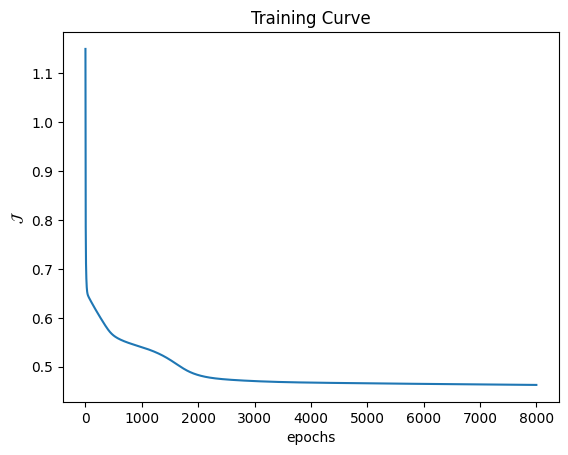

{1: array([[ 1.39885940e-01, -3.46816181e-01, -2.44269957e-03,
        -1.46614427e+00,  4.54441082e-01, -8.26840465e-02],
       [-2.22183142e-01,  4.88728903e-01,  7.27213154e-01,
        -1.12152277e+00, -1.31947946e+00,  1.02520541e+00],
       [ 1.09709879e+00,  2.44498451e+00,  5.97530229e-02,
        -1.20171851e+00,  9.60928561e-02, -1.12679577e-01],
       [-6.53403824e-01, -3.79915557e-01,  4.98311993e-01,
        -9.65117650e-01,  8.83925045e-01, -4.81400196e-01],
       [-5.77344137e-01, -4.78135093e-01,  1.76498100e+00,
        -8.93951301e-01,  5.58120743e-01, -2.90120389e+00],
       [ 5.70413670e-01,  1.59835684e+00,  9.78115527e-03,
         6.62456461e-01, -1.24701471e+00, -1.46914999e-02],
       [-8.97547730e-01,  1.16012852e+00, -2.75756094e-01,
        -6.01603914e-01,  7.14411339e-01, -1.51353098e-01],
       [-3.44007867e-01,  1.16650798e+00, -6.35001654e-02,
         4.71958758e-01, -4.80404889e-01,  6.21837697e-02],
       [-1.34290954e+00,  7.40478624e-01, -2

In [221]:
my_ann_classifier = ANN(architecture=[6,8, 4], activations=[np.tanh]*3)
#neurons= 2,  eta=0.001, epochs = 30000
#epochs= 4000, eta= 0.1
#neurons= 4,  eta=0.1, epochs = 8000
#[6, 8, 4], Eta=0.05, Epochs=2000 ### Good Good
my_ann_classifier.fit(X_train,y_train, eta=0.1, epochs=8000, show_curve=True)
y_hat_ANN=my_ann_classifier.predict(X_test)

print(my_ann_classifier.W)
print(my_ann_classifier.B)
print(f"Testing Accuracy:  {accuracy(y_test,y_hat_ANN):0.4f}")

Text(0.5, 47.7222222222222, 'Predicted label')

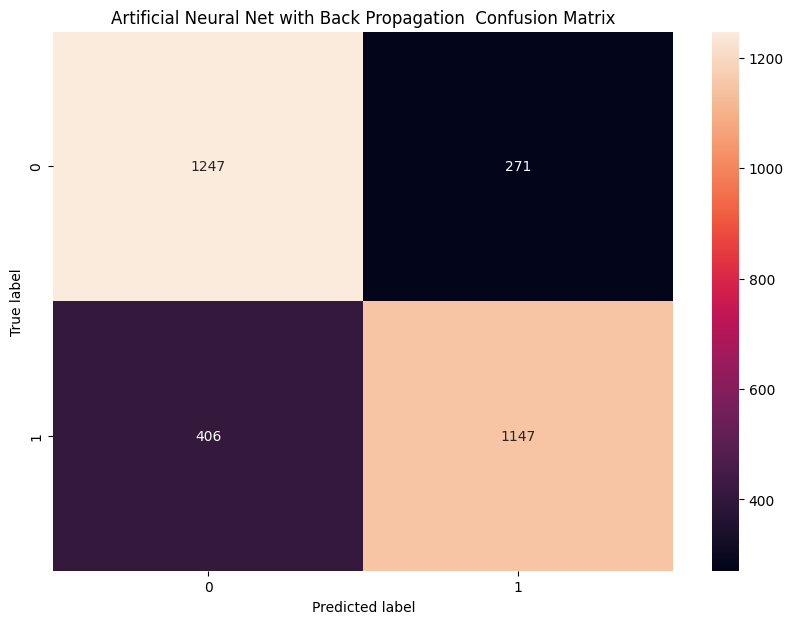

In [222]:
## Artificial Neural Net with Back Propagation
plt.figure(figsize=(10,7))
y_actual_ANN = pd.Series(y_test, name='Actual')
y_pred_ANN = pd.Series(y_hat_ANN, name='Predicted')
cm = pd.crosstab(y_actual_ANN, y_pred_ANN)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.title("Artificial Neural Net with Back Propagation  Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# my_ann_classifier = ANN(architecture=[6,8, 4], activations=[ReLU] * (2) + [np.tanh])
# my_ann_classifier.fit(X_train,y_train, eta=0.05, epochs = 6000, show_curve=True)
# y_hat_ANN=my_ann_classifier.predict(X_test)

# print(my_ann_classifier.W)
# print(my_ann_classifier.B)
# print(f"Testing Accuracy:  {accuracy(y_test,y_hat_ANN):0.4f}")

In [ ]:
# def scale_new_data_point(new_data_point, scaling_params, columns):
#     scaled_data_point = []
#     for i, column in enumerate(columns):
#         if column in scaling_params:
#             min_value = scaling_params[column]['min']
#             max_value = scaling_params[column]['max']
#             scaled_value = (new_data_point[i] - min_value) / (max_value - min_value)
#             scaled_data_point.append(scaled_value)
#         else:
#             scaled_data_point.append(new_data_point[i])

#     return scaled_data_point

# columns = ['longitude', 'latitude', 'lot_acres', 'sqrt_ft', 'bedrooms', 'bathrooms', 'garage', 'fireplaces']
# teacher_test = [[-110.3782, 31.356362, 2154, 10500, 13, 10, 0, 6]]

# scaled_teacher_test = [scale_new_data_point(point, scaling_params, columns) for point in teacher_test]
# scaled_teacher_test

# Test_case = ANN.predict(scaled_teacher_test)
# Test_case
